### Day02 work
- datasets: sklearn.datasets.load_diabets
- goal: find high associated feature
- feature: age, sex, bmi, bp(blood pressure), tc(total serum cholesterol), ldl(low-density lipoproteins),  
        - hdl(high-density lipoproteins), tch( total cholesterol / HDL), ltg(possibly log of serum triglycerides level), glu(blood sugar level)
- label: load_diabets.target
- learning algorithm: KNN Regressor
- data scalong: True

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
diabetes_data = load_diabetes(scaled=False)

In [3]:
diabetes_data

{'data': array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
        [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
        [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
        ...,
        [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
        [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
        [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51

In [4]:
colname = diabetes_data.feature_names
data = diabetes_data.data
target = diabetes_data.target

In [5]:
colnames = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']
diabetes_df = pd.DataFrame(data, columns=colnames)
diabetes_df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [6]:
diabetes_df['target'] = target

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [8]:
diabetes_df.corr()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
tc,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
ltg,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
glu,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


- feature & feature
    - ldl, tc -> corr: 0.89663
    - hdl, tch -> coor: -0.738493
- feature & target
    - bmi -> corr: 0.586450
    - ltg(혈청 글리세이드 수치?) -> corr: 0.565883

In [9]:
target_corr = diabetes_df[['bmi', 'ltg','target']].corr()
target_corr

,bmi,ltg,target
bmi,1.000000,0.446157,0.586450
ltg,0.446157,1.000000,0.565883
target,0.586450,0.565883,1.000000


In [10]:
target_corr.loc['bmi', 'target']

0.5864501344746884

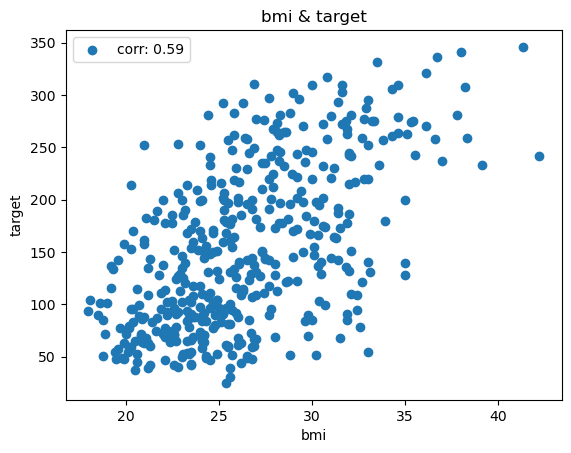

In [11]:
plt.scatter(diabetes_df['bmi'], diabetes_df['target'], label=f'corr: {target_corr.iloc[0, 2]:.2f}')
plt.title('bmi & target')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()

plt.show()

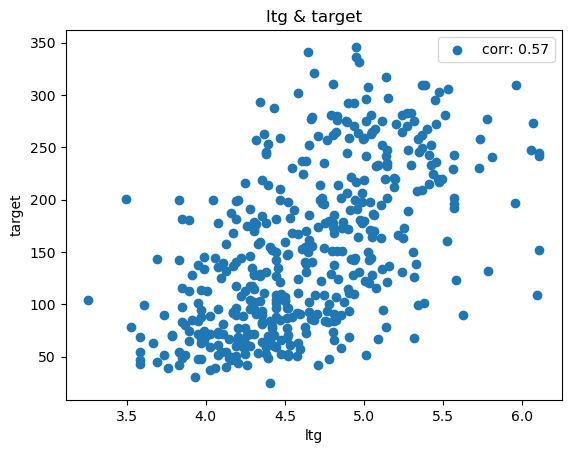

In [12]:
plt.scatter(diabetes_df['ltg'], diabetes_df['target'], label=f'corr: {target_corr.iloc[1, 2]:.2f}')
plt.title('ltg & target')
plt.xlabel('ltg')
plt.ylabel('target')
plt.legend()

plt.show()

In [13]:
# feature & label
feature = diabetes_df[['bmi', 'ltg']]
label = diabetes_df['target']

In [14]:
print(f"feature: {feature.shape}, {feature.ndim}D")
print(f"label: {label.shape}, {label.ndim}D")

feature: (442, 2), 2D
label: (442,), 1D


In [15]:
# train & test split
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state=28, test_size=0.3)

print(f"X_train: {X_train.shape}, {X_train.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")
print()
print(f"X_test: {X_test.shape}, {X_test.ndim}D")
print(f"y_test: {y_test.shape}, {y_test.ndim}D")

X_train: (309, 2), 2D
y_train: (309,), 1D

X_test: (133, 2), 2D
y_test: (133,), 1D


In [17]:
len(X_train) / len(diabetes_df) * 100, len(X_test) / len(diabetes_df) * 100

(69.90950226244344, 30.09049773755656)

In [18]:
# feature scaling
# algorithm: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(X_train, y_train)

MinMaxScaler()

In [21]:
scaler.min_, scaler.scale_, scaler.data_min_, scaler.data_max_

(array([-0.74380165, -1.36650391]),
 array([0.04132231, 0.38750678]),
 array([18.    ,  3.5264]),
 array([42.2  ,  6.107]))

In [22]:
# feature & label scaling
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [23]:
print(f"X_train_scaled: {X_train_scaled.shape}, {X_train_scaled.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")

X_train_scaled: (309, 2), 2D
y_train: (309,), 1D


In [24]:
# model learning
from sklearn.neighbors import KNeighborsRegressor

In [25]:
model = KNeighborsRegressor()

In [26]:
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [27]:
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(2, 309, 'euclidean', {})

In [28]:
# find optima K

scores = {}
for k in range(1, model.n_samples_fit_+1):
    model.n_neighbors = k
    scores[k] = model.score(X_test_scaled, y_test)

In [29]:
sorted_score = sorted(scores.items(), key=lambda x: x[1], reverse=True)
sorted_score[0]

(76, 0.43155035007826725)

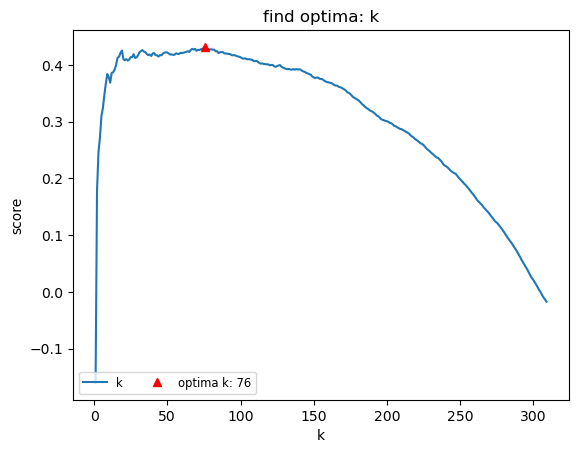

In [30]:
plt.plot(list(scores.keys()), list(scores.values()), label='k')
plt.plot(sorted_score[0][0], sorted_score[0][1], color='red', linestyle='', marker='^', label=f'optima k: {sorted_score[0][0]}')

plt.title('find optima: k')
plt.xlabel('k')
plt.ylabel('score')
plt.legend(loc='lower left', ncol=3, fontsize='small')
plt.show()

In [31]:
# model apply
optima_k = sorted_score[0][0]
model.n_neighbors = optima_k

In [32]:
# prediction
new_data = pd.DataFrame([[25, 4.8]], columns=['bmi', 'ltg'])
print(f"new_data: {new_data.shape}, {new_data.ndim}D")
print()

scaled_new_data = scaler.transform(new_data)
print(f"scaled_new_data: {scaled_new_data.shape}, {scaled_new_data.ndim}D")
print()

prediction = model.predict(scaled_new_data)
print(prediction)

new_data: (1, 2), 2D

scaled_new_data: (1, 2), 2D

[145.89473684]


In [33]:
# neighbors
distance, index = model.kneighbors(scaled_new_data)

print(distance, index, sep='\n')

[[0.00444119 0.01918944 0.02170419 0.0217793  0.02532667 0.02608264
  0.03094154 0.03712288 0.03748936 0.03878881 0.04135138 0.05715138
  0.06155723 0.06402782 0.06574194 0.06849175 0.0686858  0.06958559
  0.07005981 0.07040683 0.07041474 0.07079386 0.07079386 0.07122274
  0.07265137 0.07479498 0.07480452 0.07481979 0.07484779 0.0786546
  0.0786546  0.08098401 0.0832603  0.08535822 0.092672   0.09489633
  0.09506734 0.09515883 0.09579862 0.09607663 0.09636197 0.09814317
  0.09816025 0.09977804 0.10015477 0.10070728 0.10485884 0.10492935
  0.10619783 0.10707617 0.10771448 0.10976643 0.10976643 0.10982934
  0.11271201 0.11275907 0.11294065 0.11620502 0.11697396 0.11778339
  0.11894231 0.12423541 0.12534011 0.12646372 0.12657655 0.12992046
  0.13008307 0.13644964 0.13851782 0.13874638 0.1394393  0.13956741
  0.13962121 0.13998927 0.14765266 0.1485121 ]]
[[287 142 185 257 101  53 292 202 155 197 164 281  47 255  42 166  12  51
  217 213  75 210  15  29  50  62   5 191 297  59 153 116  98 1

In [34]:
print(X_train_scaled[index.reshape(-1)])
print(y_train[index.reshape(-1)])

[[0.28512397 0.49190111]
 [0.30165289 0.47888088]
 [0.27272727 0.50759513]
 [0.29752066 0.51367899]
 [0.30991736 0.47888088]
 [0.31404959 0.48542975]
 [0.30578512 0.51968534]
 [0.30165289 0.5285205 ]
 [0.25206612 0.49825622]
 [0.29752066 0.5314268 ]
 [0.24793388 0.49507866]
 [0.26033058 0.44423777]
 [0.2768595  0.43323258]
 [0.25206612 0.5456483 ]
 [0.34297521 0.5314268 ]
 [0.22727273 0.52266915]
 [0.26446281 0.42947377]
 [0.30165289 0.56200109]
 [0.24793388 0.43695265]
 [0.21900826 0.49825622]
 [0.35950413 0.4886848 ]
 [0.34710744 0.5343331 ]
 [0.23140496 0.5343331 ]
 [0.32231405 0.55661474]
 [0.22727273 0.5314268 ]
 [0.36363636 0.50139502]
 [0.3553719  0.5285205 ]
 [0.36363636 0.48542975]
 [0.34297521 0.5456483 ]
 [0.3677686  0.49825622]
 [0.2107438  0.49825622]
 [0.35123967 0.5456483 ]
 [0.32231405 0.56994497]
 [0.37190083 0.47217701]
 [0.2768595  0.58536774]
 [0.32644628 0.40622336]
 [0.35950413 0.42947377]
 [0.19421488 0.49825622]
 [0.36363636 0.55390219]
 [0.19421488 0.50759513]


In [35]:
prediction

array([145.89473684])

In [36]:
scaled_new_data

array([[0.2892562 , 0.49352864]])

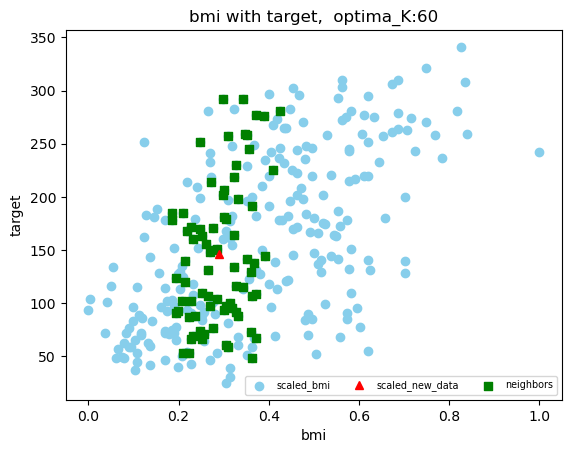

In [37]:
plt.scatter(X_train_scaled[:, 0], y_train, c='skyblue', label='scaled_bmi')
plt.plot(scaled_new_data[0, 0], prediction[0], color='red', marker='^', linestyle='', label='scaled_new_data')
plt.scatter(X_train_scaled[index.reshape(-1), 0], y_train[index.reshape(-1)], c='green', marker='s', label='neighbors')

plt.title('bmi with target,  optima_K:60')
plt.ylabel('target')
plt.xlabel('bmi')
plt.legend(loc='lower right', ncol=4, fontsize='x-small')
plt.show()

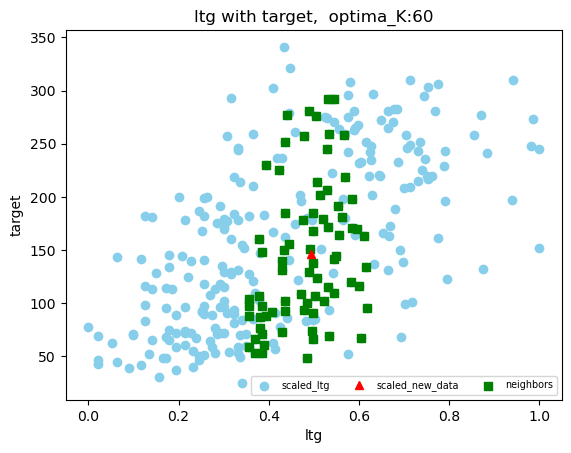

In [38]:
plt.scatter(X_train_scaled[:, 1], y_train, c='skyblue', label='scaled_ltg')
plt.plot(scaled_new_data[0, 1], prediction[0], color='red', marker='^', linestyle='', label='scaled_new_data')
plt.scatter(X_train_scaled[index.reshape(-1), 1], y_train[index.reshape(-1)], c='green', marker='s', label='neighbors')

plt.title('ltg with target,  optima_K:60')
plt.ylabel('target')
plt.xlabel('ltg')
plt.legend(loc='lower right', ncol=4, fontsize='x-small')
plt.show()